# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [1]:
!pip install pymongo

     |████████████████████████████████| 509 kB 18.4 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

     |████████████████████████████████| 188 kB 15.6 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install tweepy

     |████████████████████████████████| 147 kB 22.2 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install twitter

     |████████████████████████████████| 54 kB 3.7 MB/s  eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [6]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [7]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [8]:
client = MongoClient(mongod_connect)
db = client.gp10 # use or create a database named demo
tweet_collection = db.lab11 #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [9]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [5]:
track = ['election'] # define the keywords, tweets contain election

locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [ ]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#  (locations = locations)   #Use either track or locations

## Use the REST API to Collect Tweets

Authorize the REST API 

In [10]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [11]:
count = 100 #number of returned tweets, default and max is 100
geocode = "37.5247764,-77.5633011,150mi"  # defin the location, in Harrisonburg, VA
q = "covid19"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [12]:
search_results = rest_api.search.tweets( count=count,q=q, geocode=geocode) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Tue Nov 17 22:38:04 +0000 2020'
'Tue Nov 17 22:37:40 +0000 2020'
'Tue Nov 17 22:37:33 +0000 2020'
'Tue Nov 17 22:37:27 +0000 2020'
'Tue Nov 17 22:37:23 +0000 2020'
'Tue Nov 17 22:37:18 +0000 2020'
'Tue Nov 17 22:37:13 +0000 2020'
'Tue Nov 17 22:37:01 +0000 2020'
'Tue Nov 17 22:37:00 +0000 2020'
'Tue Nov 17 22:36:55 +0000 2020'
'Tue Nov 17 22:36:47 +0000 2020'
'Tue Nov 17 22:36:43 +0000 2020'
'Tue Nov 17 22:36:40 +0000 2020'
'Tue Nov 17 22:36:37 +0000 2020'
'Tue Nov 17 22:36:37 +0000 2020'
'Tue Nov 17 22:36:31 +0000 2020'
'Tue Nov 17 22:36:26 +0000 2020'
'Tue Nov 17 22:36:17 +0000 2020'
'Tue Nov 17 22:36:12 +0000 2020'
'Tue Nov 17 22:36:04 +0000 2020'
'Tue Nov 17 22:36:03 +0000 2020'
'Tue Nov 17 22:35:51 +0000 2020'
'Tue Nov 17 22:35:51 +0000 2020'
'Tue Nov 17 22:35:46 +0000 2020'
'Tue Nov 17 22:35:36 +0000 2020'
'Tue Nov 17 22:35:24 +0000 2020'
'Tue Nov 17 22:35:17 +0000 2020'
'Tue Nov 17 22:35:11 +0000 2020'
'Tue Nov 17 22:35:11 +0000 2020'
'Tue Nov 17 22:35:00 +0000 2020'
'Tue Nov 1

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [13]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                        geocode=geocode, max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Tue Nov 17 22:28:10 +0000 2020'
'Tue Nov 17 22:28:04 +0000 2020'
'Tue Nov 17 22:28:02 +0000 2020'
'Tue Nov 17 22:28:01 +0000 2020'
'Tue Nov 17 22:27:49 +0000 2020'
'Tue Nov 17 22:27:46 +0000 2020'
'Tue Nov 17 22:27:35 +0000 2020'
'Tue Nov 17 22:27:32 +0000 2020'
'Tue Nov 17 22:27:31 +0000 2020'
'Tue Nov 17 22:27:30 +0000 2020'
'Tue Nov 17 22:27:28 +0000 2020'
'Tue Nov 17 22:27:12 +0000 2020'
'Tue Nov 17 22:27:05 +0000 2020'
'Tue Nov 17 22:27:04 +0000 2020'
'Tue Nov 17 22:27:02 +0000 2020'
'Tue Nov 17 22:26:38 +0000 2020'
'Tue Nov 17 22:26:37 +0000 2020'
'Tue Nov 17 22:26:00 +0000 2020'
'Tue Nov 17 22:25:56 +0000 2020'
'Tue Nov 17 22:25:54 +0000 2020'
'Tue Nov 17 22:25:51 +0000 2020'
'Tue Nov 17 22:25:49 +0000 2020'
'Tue Nov 17 22:25:47 +0000 2020'
'Tue Nov 17 22:25:42 +0000 2020'
'Tue Nov 17 22:25:38 +0000 2020'
'Tue Nov 17 22:25:32 +0000 2020'
'Tue Nov 17 22:25:32 +0000 2020'
'Tue Nov 17 22:25:20 +0000 2020'
'Tue Nov 17 22:25:08 +0000 2020'
'Tue Nov 17 22:25:05 +0000 2020'
'Tue Nov 1

'Tue Nov 17 21:50:15 +0000 2020'
'Tue Nov 17 21:50:05 +0000 2020'
'Tue Nov 17 21:50:04 +0000 2020'
'Tue Nov 17 21:49:49 +0000 2020'
'Tue Nov 17 21:49:43 +0000 2020'
'Tue Nov 17 21:49:43 +0000 2020'
'Tue Nov 17 21:49:42 +0000 2020'
'Tue Nov 17 21:49:37 +0000 2020'
'Tue Nov 17 21:49:32 +0000 2020'
'Tue Nov 17 21:49:24 +0000 2020'
'Tue Nov 17 21:49:22 +0000 2020'
'Tue Nov 17 21:49:20 +0000 2020'
'Tue Nov 17 21:49:08 +0000 2020'
'Tue Nov 17 21:48:34 +0000 2020'
'Tue Nov 17 21:48:17 +0000 2020'
'Tue Nov 17 21:48:17 +0000 2020'
'Tue Nov 17 21:48:00 +0000 2020'
'Tue Nov 17 21:47:58 +0000 2020'
'Tue Nov 17 21:47:29 +0000 2020'
'Tue Nov 17 21:47:29 +0000 2020'
'Tue Nov 17 21:47:28 +0000 2020'
'Tue Nov 17 21:47:28 +0000 2020'
'Tue Nov 17 21:47:28 +0000 2020'
'Tue Nov 17 21:47:25 +0000 2020'
'Tue Nov 17 21:47:16 +0000 2020'
'Tue Nov 17 21:47:05 +0000 2020'
'Tue Nov 17 21:46:54 +0000 2020'
'Tue Nov 17 21:46:48 +0000 2020'
'Tue Nov 17 21:46:38 +0000 2020'
'Tue Nov 17 21:46:36 +0000 2020'
'Tue Nov 1

'Tue Nov 17 21:17:19 +0000 2020'
'Tue Nov 17 21:17:18 +0000 2020'
'Tue Nov 17 21:17:14 +0000 2020'
'Tue Nov 17 21:17:13 +0000 2020'
'Tue Nov 17 21:17:12 +0000 2020'
'Tue Nov 17 21:17:07 +0000 2020'
'Tue Nov 17 21:17:05 +0000 2020'
'Tue Nov 17 21:17:03 +0000 2020'
'Tue Nov 17 21:17:00 +0000 2020'
'Tue Nov 17 21:16:48 +0000 2020'
'Tue Nov 17 21:16:37 +0000 2020'
'Tue Nov 17 21:16:28 +0000 2020'
'Tue Nov 17 21:16:27 +0000 2020'
'Tue Nov 17 21:16:18 +0000 2020'
'Tue Nov 17 21:16:15 +0000 2020'
'Tue Nov 17 21:16:01 +0000 2020'
'Tue Nov 17 21:15:55 +0000 2020'
'Tue Nov 17 21:15:37 +0000 2020'
'Tue Nov 17 21:15:30 +0000 2020'
'Tue Nov 17 21:15:29 +0000 2020'
'Tue Nov 17 21:15:27 +0000 2020'
'Tue Nov 17 21:15:23 +0000 2020'
'Tue Nov 17 21:15:01 +0000 2020'
'Tue Nov 17 21:15:00 +0000 2020'
'Tue Nov 17 21:14:53 +0000 2020'
'Tue Nov 17 21:14:51 +0000 2020'
'Tue Nov 17 21:14:45 +0000 2020'
'Tue Nov 17 21:14:33 +0000 2020'
'Tue Nov 17 21:14:32 +0000 2020'
'Tue Nov 17 21:14:23 +0000 2020'
'Tue Nov 1

'Tue Nov 17 20:44:42 +0000 2020'
'Tue Nov 17 20:44:40 +0000 2020'
'Tue Nov 17 20:44:36 +0000 2020'
'Tue Nov 17 20:44:32 +0000 2020'
'Tue Nov 17 20:44:31 +0000 2020'
'Tue Nov 17 20:44:30 +0000 2020'
'Tue Nov 17 20:44:23 +0000 2020'
'Tue Nov 17 20:44:13 +0000 2020'
'Tue Nov 17 20:44:12 +0000 2020'
'Tue Nov 17 20:44:06 +0000 2020'
'Tue Nov 17 20:44:05 +0000 2020'
'Tue Nov 17 20:44:04 +0000 2020'
'Tue Nov 17 20:44:02 +0000 2020'
'Tue Nov 17 20:43:55 +0000 2020'
'Tue Nov 17 20:43:53 +0000 2020'
'Tue Nov 17 20:43:47 +0000 2020'
'Tue Nov 17 20:43:39 +0000 2020'
'Tue Nov 17 20:43:38 +0000 2020'
'Tue Nov 17 20:43:36 +0000 2020'
'Tue Nov 17 20:43:34 +0000 2020'
'Tue Nov 17 20:43:28 +0000 2020'
'Tue Nov 17 20:43:19 +0000 2020'
'Tue Nov 17 20:43:10 +0000 2020'
'Tue Nov 17 20:43:06 +0000 2020'
'Tue Nov 17 20:43:02 +0000 2020'
'Tue Nov 17 20:42:58 +0000 2020'
'Tue Nov 17 20:42:45 +0000 2020'
'Tue Nov 17 20:42:40 +0000 2020'
'Tue Nov 17 20:42:37 +0000 2020'
'Tue Nov 17 20:42:24 +0000 2020'
'Tue Nov 1

'Tue Nov 17 20:14:44 +0000 2020'
'Tue Nov 17 20:14:41 +0000 2020'
'Tue Nov 17 20:14:36 +0000 2020'
'Tue Nov 17 20:14:30 +0000 2020'
'Tue Nov 17 20:14:29 +0000 2020'
'Tue Nov 17 20:14:10 +0000 2020'
'Tue Nov 17 20:14:10 +0000 2020'
'Tue Nov 17 20:13:59 +0000 2020'
'Tue Nov 17 20:13:57 +0000 2020'
'Tue Nov 17 20:13:55 +0000 2020'
'Tue Nov 17 20:13:50 +0000 2020'
'Tue Nov 17 20:13:45 +0000 2020'
'Tue Nov 17 20:13:44 +0000 2020'
'Tue Nov 17 20:13:39 +0000 2020'
'Tue Nov 17 20:13:38 +0000 2020'
'Tue Nov 17 20:13:15 +0000 2020'
'Tue Nov 17 20:13:05 +0000 2020'
'Tue Nov 17 20:13:02 +0000 2020'
'Tue Nov 17 20:12:47 +0000 2020'
'Tue Nov 17 20:12:35 +0000 2020'
'Tue Nov 17 20:12:11 +0000 2020'
'Tue Nov 17 20:12:08 +0000 2020'
'Tue Nov 17 20:12:05 +0000 2020'
'Tue Nov 17 20:11:59 +0000 2020'
'Tue Nov 17 20:11:56 +0000 2020'
'Tue Nov 17 20:11:50 +0000 2020'
'Tue Nov 17 20:11:49 +0000 2020'
'Tue Nov 17 20:11:46 +0000 2020'
'Tue Nov 17 20:11:42 +0000 2020'
'Tue Nov 17 20:11:36 +0000 2020'
'Tue Nov 1

KeyboardInterrupt: 

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [14]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

1288
1119


Create a text index and print the Tweets containing specific keywords. 

In [15]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [18]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "covid19"}}) # return tweets contain vote

Use pprint to display tweets

In [19]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: BarbM1712
text: @mtgreenee Obama deaths to Covid19- ZERO
Clinton deaths to Covid19- ZERO
Trump deaths to Covid19 - 240,148 &amp; counti… https://t.co/FE7ta1E0Bz
----
name: City of Roanoke
text: November COVID19 test dates from @VDHgov #covid19 https://t.co/dSedlU24x1
----
name: Roanoke Fire-EMS
text: RT @City_of_Roanoke: November COVID19 test dates from @VDHgov #covid19 https://t.co/dSedlU24x1
----
name: Democratic Promise
text: RT @City_of_Roanoke: November COVID19 test dates from @VDHgov #covid19 https://t.co/dSedlU24x1
----
name: RoanokeTransportation
text: RT @City_of_Roanoke: November COVID19 test dates from @VDHgov #covid19 https://t.co/dSedlU24x1
----
name: 🍨~Your Official Lime Pop 'Rona Hoarder~🍨
text: @jefftimmer Doesn't he have Covid19 currently?
----
name: Oso grizzly
text: @XOCO1238 @AXN_Espana Covid19..
----
name: On Demand Escrow
text: RT @snaheedy: #OrangeCounty #COVID19
----
name: Pliney the middle
text: @jennybethm Sucks to be in those states. #COVID19
----


In [20]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "covid19"}}) # return tweets contain vote

Use pandas to display tweets

In [21]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,lang,extended_entities,possibly_sensitive,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,5fabf8b771b7b13c059b8a19,Wed Nov 11 14:06:15 +0000 2020,1326526656773726211,1326526656773726211,@mtgreenee Obama deaths to Covid19- ZERO\nClin...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.326300e+18,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
1,5fabf8f671b7b13c059b91ca,Wed Nov 11 03:20:01 +0000 2020,1326364029057691648,1326364029057691648,November COVID19 test dates from @VDHgov #covi...,False,"{'hashtags': [{'text': 'covid19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,5,False,False,en,"{'media': [{'id': 1326364024276193282, 'id_str...",False,NaN,NaN,NaN,NaN
2,5fabf8f271b7b13c059b90d0,Wed Nov 11 04:07:55 +0000 2020,1326376083739070464,1326376083739070464,RT @City_of_Roanoke: November COVID19 test dat...,False,"{'hashtags': [{'text': 'covid19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,en,"{'media': [{'id': 1326364024276193282, 'id_str...",False,{'created_at': 'Wed Nov 11 03:20:01 +0000 2020...,NaN,NaN,NaN
3,5fabf8f271b7b13c059b90cf,Wed Nov 11 04:08:00 +0000 2020,1326376103229927424,1326376103229927424,RT @City_of_Roanoke: November COVID19 test dat...,False,"{'hashtags': [{'text': 'covid19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,0,False,False,en,"{'media': [{'id': 1326364024276193282, 'id_str...",False,{'created_at': 'Wed Nov 11 03:20:01 +0000 2020...,NaN,NaN,NaN
4,5fabf8e071b7b13c059b8d34,Wed Nov 11 10:29:25 +0000 2020,1326472090237677569,1326472090237677569,RT @City_of_Roanoke: November COVID19 test dat...,False,"{'hashtags': [{'text': 'covid19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,en,"{'media': [{'id': 1326364024276193282, 'id_str...",False,{'created_at': 'Wed Nov 11 03:20:01 +0000 2020...,NaN,NaN,NaN
5,5fabf8f371b7b13c059b9102,Wed Nov 11 03:59:28 +0000 2020,1326373955721179137,1326373955721179137,@jefftimmer Doesn't he have Covid19 currently?,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.326361e+18,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
6,5fabf8e471b7b13c059b8e09,Wed Nov 11 08:39:17 +0000 2020,1326444372469166082,1326444372469166082,@XOCO1238 @AXN_Espana Covid19..,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.326429e+18,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
7,5fabf8f271b7b13c059b909d,Wed Nov 11 04:20:47 +0000 2020,1326379322123358208,1326379322123358208,RT @snaheedy: #OrangeCounty #COVID19,False,"{'hashtags': [{'text': 'OrangeCounty', 'indice...","{'iso_language_code': 'und', 'result_type': 'r...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,und,NaN,NaN,{'created_at': 'Tue Nov 10 23:51:36 +0000 2020...,1.326311e+18,1326310744636452866,NaN
8,5fabf8f071b7b13c059b902f,Wed Nov 11 04:46:22 +0000 2020,1326385758647836673,1326385758647836673,@jennybethm Sucks to be in those states. #COVID19,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.326299e+18,...,1,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
9,5fabf8f671b7b13c059b91aa,Wed Nov 11 03:27:29 +0000 2020,1326365907812151296,1326365907812151296,#C

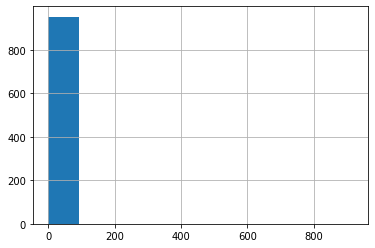

In [22]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count